Nothing done.
Finite approximation: f' = [-f(x-0.5h) + f(x+0.5h)] / [h^1]
Finite approximation: f' = [-f(x-0.5h) + f(x+0.5h)] / [h^1]


c:\Users\Ephraim\GitHub\Finite-Difference\FD.py:711: Warning: Overriding values
  warnings.warn("Overriding values",category=Warning)


interactive(children=(Dropdown(description='Field', options=('u dot', 'u', 'v dot', 'v', 'eta dot', 'eta'), va…

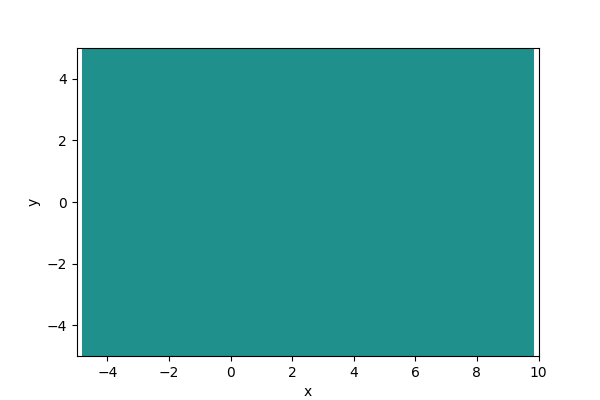

In [29]:
import FD as FD

import numpy as np

import imp
imp.reload(FD)
%reset


%matplotlib widget

m = FD.Model(
    {"x":np.linspace(-5,10,100),
     "y":np.linspace(-5,5,100),
     "t":range(0,200)},
     periodic=[],
     time_axis="t"
)


u = FD.Field(m,"u",edge_axes="x",n_time_ders=1)
v = FD.Field(m,"v",edge_axes="y",n_time_ders=1)

eta = FD.Field(m,"eta",n_time_ders=1)


u.set_BC("-1","x","start")
u.set_BC("1","x","end")

v.set_BC("1","y","start")
v.set_BC("-1","y","end")


eta.set_IC("0")#exp(-(x-2)**2-(y-2)**2)")
u.set_IC("0")
v.set_IC("0")

#dudx = Field(m)
#dudy = Field(m)

c_e = FD.Stencil([-1/2,1/2],1,axis_type="cell",der_axis_type="edge")
e_c = FD.Stencil([-1/2,1/2],1,axis_type="edge",der_axis_type="cell")


cx = .1
cy = .1

g = .1
h = 2

while not m.finished:

    detadx = c_e.der(eta.prev,"x") # required to write u.prev

    detady = c_e.der(eta.prev,"y")

    u.dot.assign_update(g*detadx)

    v.dot.assign_update(g*detady)

    u.time_integrate_update()
    v.time_integrate_update()

    dudx = e_c.der(u.new,"x")
    dvdy = e_c.der(v.new,"y")

    eta.dot.assign_update(h*dudx+h*dvdy)


    eta.time_integrate_update()

    m.increment_time()

m.interact()



In [ ]:
%matplotlib widget
import class_stuff as cl
import importlib
importlib.reload(cl)
a = cl.MyClass(3)

a.interact()

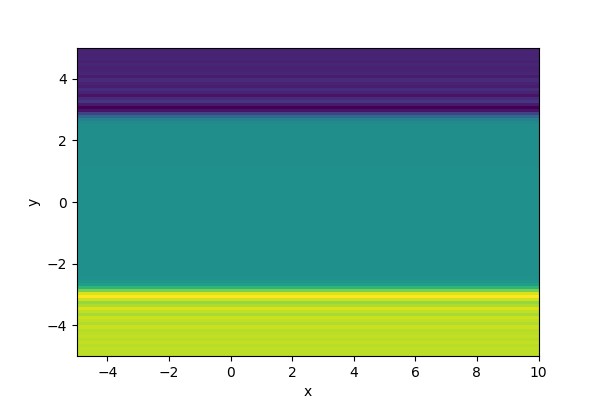

In [28]:
import matplotlib.pyplot as plt
v.imshow({"t":50})
plt.show()